In [1]:
import tensorflow as tf
print("tf version - ", tf.__version__)
import numpy as np
print("numpy version - ", np.__version__)
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version - ", matplotlib.__version__)

tf version -  2.0.0
numpy version -  1.17.3
matplotlib version -  3.1.1


In [2]:
from tensorflow import keras

In [3]:
data = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [5]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Cost',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

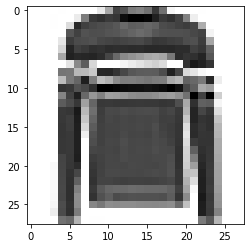

In [7]:
plt.imshow(train_images[5], cmap=plt.cm.binary)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1960 - accuracy: 0.9265
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1902 - accuracy: 0.9279
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1834 - accuracy: 0.9317
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1804 - accuracy: 0.9323
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1771 - accuracy: 0.9337


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels )

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [19]:
print('Tested acc: ', test_acc)

Tested acc:  0.8756


In [20]:
prediction = model.predict(test_images)
print(class_name[np.argmax(prediction[0])])

Ankle boot


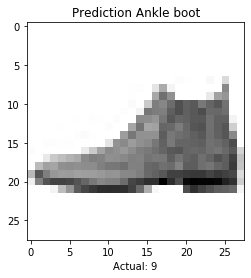

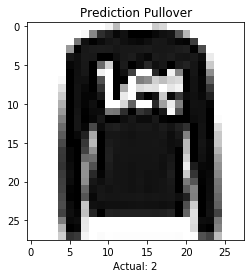

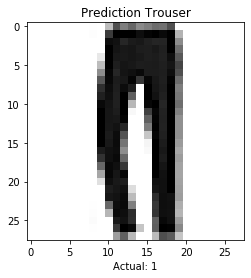

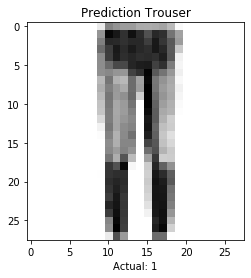

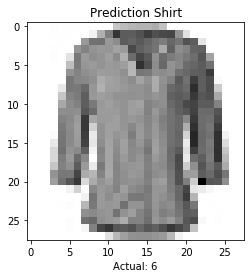

In [21]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: {}".format(test_labels[i]))
    plt.title("Prediction {}".format(class_name[np.argmax(prediction[i])]))
    plt.show()